# Proyecto ecuacion de calor en Python
Utilizando el metodo de diferencias finitas para resolver la ecuacion en dos dimensiones espaciales.

In [64]:
import numpy as np

def ftcs_calor(Th, Tc, kappa, L, a, M, N, h, t_fin):
    # Condiciones iniciales
    T = np.full((M+1, N+1), Tc, dtype=float)
    T[24:27, 24:27] = Th
    
    #arreglo para hacer las operaciones con FTCS
    Tk = T.copy()

    #Los otros parametros
    t = 0.0
    dy= a / (N - 1)  #Particiones del ancho
    dx = L / (M - 1)  #Partciones del largo

    its = 0

    #Aqui se implementa el FTCS
    while t < t_fin:
        Tk = T.copy()
        for i in range(0, M):
            for j in range(0, N):
               if i < 24 or i > 26 or j < 24 or j > 26:
                    Tk[i, j] = (((kappa*h)/(dy*dx)) * ((dy/dx) * (T[i-1, j] + T[i+1, j] - 2*T[i, j])) + ((kappa*h)/(dy*dx)) * ((dx/dy) * (T[i, j+1] + T[i, j-1] - 2*T[i, j])) + T[i, j])

        T = Tk.copy()
        t += h
        its += 1
    return T, its


In [75]:
valores, iteraciones = ftcs_calor(100.0, 20.0, 98.8e-6, 0.5, 0.5, 50, 50, 1e-2, 120.0)
print(iteraciones)

12000


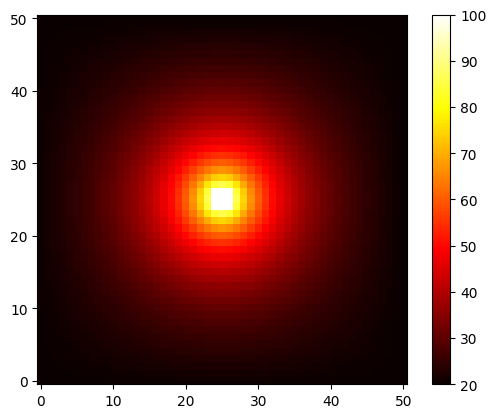

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(valores, origin='lower', cmap='hot')
plt.colorbar()
plt.show()

Prueba con codigo vectorial de numpy:

In [12]:
import numpy as np

def ftcs_calor(Th, Tc, kappa, L, a, M, N, h, t_fin):
    T = np.zeros((M+1, N+1), dtype=float)
    # Condiciones iniciales
    T = np.full((M+1, N+1), Tc, dtype=float)
    T[M//2, N//2] = Th
    
    
    # Arreglo para hacer las operaciones con FTCS
    Tk = np.copy(T)  # Crear una copia de T
    
    # Otros parámetros
    t = 0.0
    dy = a / N  # Particiones del ancho
    dx = L / M  # Particiones del largo
    d1 = dy / dx  # dy/dx que es parte de la formula
    d2 = dx / dy  # dx/dy que es parte de la formula
    Fo = (kappa * t_fin) / (dy * dx)  # Número de Fourier

    # Implementación del FTCS
    while t < t_fin:
        T[1:M, 1:N] = Fo * (d1 * (T[0:M-1, 1:N] + T[2:M+1, 1:N] - 2*T[1:M, 1:N]) + 
                            d2 * (T[1:M, 0:N-1] + T[1:M, 2:N+1] - 2*T[1:M, 1:N])) + T[1:M, 1:N]

        T[M//2, N//2] = Th
        T = np.copy(Tk)  # Actualizar T con los nuevos valores de Tk
        t += h

    return T

In [13]:
valores = ftcs_calor(100, 20, 22.8e-6, 10, 8, 50, 40, 1e-4, 60)

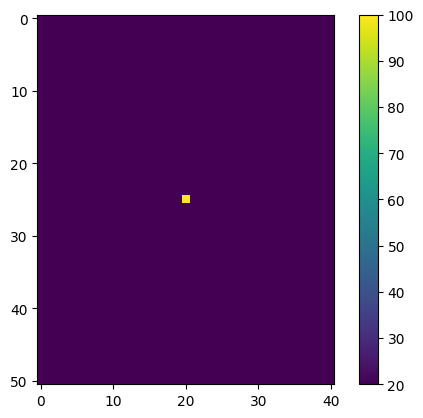

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(valores)
plt.colorbar()
plt.show()

Intento de animacion, por el segundo metodo:

In [1]:
import numpy as np

#condiciones iniciales
Ti = 100
Td = 0
Tar = 0
Tab = 120
Tp = 20
kappa = 22.8e-6 
L = 10 
a = 8 
M = 50 
N = 40 
t_fin = 30.0

T = np.zeros((M+1, N+1), dtype=float)
# Condiciones iniciales
T[:, 0] = Ti
T[:, N] = Td
T[0, :] = Tar
T[M, :] = Tab
T[1:M, 1:N] = Tp

t = 0.0
dy = a / N  # Particiones del ancho
dx = L / M  # Particiones del largo
d1 = dy / dx  # dy/dx que es parte de la formula
d2 = dx / dy  # dx/dy que es parte de la formula
Fo = (kappa * t_fin) / (dy * dx)  # Número de Fourier

#para la animacion
tsteps = 30000
times = np.linspace(0.0, t_fin, tsteps + 1)
shape = np.zeros((tsteps + 1, M+1, N+1), dtype=float)

#FTCS
for tt in range(len(times)):
    T[1:M, 1:N] = Fo * (d1 * (T[0:M-1, 1:N] + T[2:M+1, 1:N] - 2*T[1:M, 1:N]) + 
                        d2 * (T[1:M, 0:N-1] + T[1:M, 2:N+1] - 2*T[1:M, 1:N])) + T[1:M, 1:N]
    #guardar T's en funcion del tiempo
    shape[tt] = T.copy()


### Animacion:

In [10]:
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import imshow
from IPython import display

fig, ax = plt.subplots()
heatmap = ax.imshow(T, cmap='hot', interpolation='nearest')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

skip = 10
def animate(frame):
    heatmap.set_data(T)
    return heatmap
    
anim = FuncAnimation(fig, animate, frames = len(shape)//skip, interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()